
# **<center>Variational Autoencoders: </center>**


## <center> Theory and Implementation</center>


@Hachem Madmoun

----
# 1. Theory of Variational Autoencoders


## 1.1 Introduction: VAE as a continuous latent variable model

* Let's consider that our data $X_1, X_2, \dots, X_N$ is i.i.d. and distributed according to some complex distribution $p_{\theta}(x)$ 



* The objective is to model this distribution using a latent space responsible for the observations $X_1, X_2, \dots, X_N$. 




* The Gaussian Mixture Model consists of modeling the distribution $p_{\theta}(x)$ as a mixture of K Gaussians. Therefore, each observation $X_i$ is generated by one of the K gaussians, and $Z_i$ specifies which one it is. So, $Z_1, Z_2, \dots, Z_N$ are discrete values in $\{1, \dots, K \}$.


<img src="images/latent_variable.png" alt="Drawing" style="width: 100;"/>



* The Variational Autoencoder is a probabilistic model of data based on a continuous mixture of distributions. So, $p_{\theta}(x) = \int p(x \mid z, \theta) p(z) dz$ with a continuous prior $p(z) = \mathcal{N}(0, I_d)$ (where $d$ is the dimensionality of the hidden space, typically d<<D where D is the dimensionality of the data) 

    
## 1.2. Learning VAE


### 1.2.1 Setting up the objective function:


* To train this model,  we want to maximize the marginal log-likelihood $\max_{\theta} \log p(X \mid \theta)$ of our dataset. If we marginalize over the latent variables $z_i$ and consider their distibutions $q(z_i)$, we obtain a variational lower bound which depends on both the distributions $q(z_i), \ \forall i \in \{1, \dots, N \}$ and $\theta$ as follows:

\begin{align*}
    \log(p_{\theta}(x))     &= \sum_{i=1}^N \log p_{\theta}(x_i) \quad (\ X_1, \dots, X_n \  \text{are i.i.d})\\
                            &= \sum_{i=1}^N \log \left( \int_{z_i} p_{\theta}(x_i,z_i) dz_i \right)   \\    
                            &=  \sum_{i=1}^N  \log \left( \int_{z_i} \frac{p_{\theta}(x_i,z_i) q(z_i)}{q(z_i)} dz_i \right) \\
                            &\geq  \sum_{i=1}^N \int_{z_i} q(z_i) \log \left( \frac{p_{\theta}(x_i,z_i)}{q(z_i)}  \right) dz_i  \quad (\text{Jensen Inequality})\\
                            &= \sum_{i=1}^N \underbrace{\mathbb{E}_{q(z_i)}  \left[ \log \left( \frac{p_{\theta}(x_i,z_i)}{q(z_i)} \right) \right]}_{\mathcal{L}(q(z_i), \theta)} \\
\end{align*}
    


* The gap beween the marginal log-likelihood and the **variational lower bound** $\sum_{i=1}^N \mathcal{L}(q(z_i), \theta)$ is reduced to 0 when $q(z_i) = p_{\theta}(z_i \mid x_i) \ \forall i \in \{1, \dots, N\}$. ($p_{\theta}(z_i \mid x_i)$ is called the **posterior distribution**)



Indeed:




\begin{align*}
    \text{GAP}  &= \log(p_{\theta}(x)) - \sum_{i=1}^N \mathcal{L}(q(z_i), \theta) \\
                &= \sum_{i=1}^N \left( \log(p_{\theta}(x_i)) - \mathcal{L}(q(z_i), \theta) \right) \\
                &= \sum_{i=1}^N \left( \int_{z_i} q(z_i) \log(p_{\theta}(x_i)) dz_i  - \int_{z_i} q(z_i) \log \left( \frac{p_{\theta}(x_i,z_i)}{q(z_i)} \right) dz_i \right)\\
                &=  \sum_{i=1}^N \int_{z_i} q(z_i) \left(\log(p_{\theta}(x_i)) - \log \left( \frac{p_{\theta}(x_i,z_i)}{q(z_i)} \right) \right) dz_i \\
                &= \sum_{i=1}^N \int_{z_i} q(z_i) \log \left( \frac{q(z_i)}{ p_{\theta}(z_i|x_i) } \right) dz_i \\
                &= \sum_{i=1}^N \mathcal{K}\mathcal{L} \left( q(z_i) \middle\| p_{\theta}(z_i|x_i) \right)
\end{align*}




* Therefore, if we want to maximize $\log(p_{\theta}(x))$, we could alternate maximizing the variational lower bound (also called **evidence lower bound** (ELBO) with respect to $\theta$ and with respect to $q$ by making $q(z_i) = p_{\theta}(z_i \mid x_i)$ (the posterior distribution). It's the principle of **Expectation Maximization** algorithm. The E-step consists of maximizing the lower bound with respect to $q$ by taking the expectation with respect to the posterior distribution. The M-step consists in maximizing w.r.t $\theta$.



* However, if the posterior distribution $p_{\theta}(z \mid x)$ is easily calculated in the case of the Gaussian Mixture Model (or even the Hidden Markov Model), it's intractable in our case since $p_{\theta}(z \mid x) = \frac{p_{\theta}(x \mid z) p(z)}{p_{\theta}(x)}$ and the evidence $p_{\theta}(x) = \int p(x \mid z, \theta) p(z) dz$ is very hard to compute since it's no longer just a sum over a discrete set of hidden variables.



* **Variational Inference** is a way of solving the problem of approximating an unknown distribution. For that, we choose a family of known distributions Q and we minimize the KL divergence between the unknown distribution $p^*$ and the space of parametrized distributions. The bigger the family is, the smaller the optimal "distance" will be, as shown in the figure below: 


<img src="images/approx_inference_.png" alt="Drawing" style="width: 800;"/>




* To have a very flexible family Q of distributions, we use a neural network called the **encoder**.



* The learning process consists then in maximizing the variational lower bound while trying to approximate the posterior $p_{\theta}(z_i \mid x_i)$ among a family of distributions $q(z_i \mid x_i)$ using the encoder. 



* So, $\forall i \in \{1, \dots, N\} \quad  q(z_i \mid x_i) = \mathcal{N}(z_i \mid m(x_i, \phi), \text{diag}(s^2(x_i, \phi))$, $\phi$ represents all the parameters of the encoder.



* To sum up, we will try to maximize the variational lower bound $\sum_{i=1}^N \underbrace{\mathbb{E}_{q(z_i)}  \left[ \log \left( \frac{p_{\theta}(x_i,z_i)}{q(z_i)} \right) \right]}_{\text{VLB}_i} $ with $q(z_i) = q(z_i \mid x_i) = \mathcal{N}(z_i \mid m(x_i, \phi), \text{diag}(s^2(x_i, \phi))$



* The variational lower bound can be expressed differently as follows



\begin{align*}
    \forall i \in \{ 1, \dots, N \} \quad \text{VLB}_i  &= \mathbb{E}_{q(z_i \mid x_i)}  \left[ \log \left( \frac{p_{\theta}(x_i,z_i)}{q(z_i \mid x_i)} \right) \right] \\
                                                        &= \mathbb{E}_{q(z_i \mid x_i)}  \left[ \log \left( \frac{p_{\theta}(x_i \mid z_i) p(z_i)}{q(z_i \mid x_i)} \right) \right] \\
                                                        &= \mathbb{E}_{q(z_i \mid x_i)}  \left[ \log ( p_{\theta}(x_i \mid z_i)) \right] - \mathbb{E}_{q(z_i \mid x_i)}  \left[ \log \left( \frac{p(z_i)}{q(z_i \mid x_i)} \right) \right] \\
                                                        &= \mathbb{E}_{q(z_i \mid x_i)}  \left[ \log ( p_{\theta}(x_i \mid z_i)) \right] - \mathcal{K}\mathcal{L} \left( q(z_i \mid x_i) \middle\| p(z_i) \right)
\end{align*}




* Finally, our objective is:
\begin{align*}
    \max_{\theta, \phi} & \quad  \sum_{i=1}^N \left( \mathbb{E}_{q(z_i \mid x_i)}  \left[ \log ( p_{\theta}(x_i \mid z_i)) \right] - \mathcal{K}\mathcal{L} \left( q(z_i \mid x_i) \middle\| p(z_i) \right) \right) \\     
    \text{s.t.}         &  \quad  q(z_i \mid x_i) = \mathcal{N}(z_i \mid m(x_i, \phi), \text{diag}(s^2(x_i, \phi)) \ \text{and} \ p(x \mid z, \theta) \ \text{depends on the most suitable choice for the data}
\end{align*}



* As we always prefer to minimize the objective, we rewrite it as follows: 
\begin{align*}
    \min_{\theta, \phi} & \quad  \underbrace{\sum_{i=1}^N \left( - \mathbb{E}_{q(z_i \mid x_i)}  \left[ \log ( p_{\theta}(x_i \mid z_i)) \right] + \mathcal{K}\mathcal{L} \left( q(z_i \mid x_i) \middle\| p(z_i) \right) \right)}_{\textbf{Objective Function}} \\     
    \text{s.t.}         &  \quad  q(z_i \mid x_i) = \mathcal{N}(z_i \mid m(x_i, \phi), \text{diag}(s^2(x_i, \phi)) \ \text{and} \ p(x \mid z, \theta) \ \text{to be specified}
\end{align*}





* So overall, the model looks as follows: The encoder takes the input $x_i$, produces a distribution over latent codes $q(z_i \mid x_i)$ which should approximate the posterior distribution $p_{\theta}(z_i \mid x_i)$ (at least after training), samples a point from this distribution $\widehat{z_i} \sim q(z_i \mid x_i, \phi)$, and finally feeds it into a decoder that outputs a distribution over the data. 


<img src="images/variational_autoencoder.png" alt="Drawing" style="width: 800;"/>



### 1.2.2 Gradient Descent:

* We want to perform the following optimization:

\begin{align*}
    \min_{\theta, \phi} & \quad  \underbrace{\sum_{i=1}^N \left( - \mathbb{E}_{q(z_i \mid x_i)}  \left[ \log ( p_{\theta}(x_i \mid z_i)) \right] + \mathcal{K}\mathcal{L} \left( q(z_i \mid x_i) \middle\| p(z_i) \right) \right)}_{\textbf{Objective Function}} \\     
    \text{s.t.}         &  \quad  q(z_i \mid x_i) = \mathcal{N}(z_i \mid m(x_i, \phi), \text{diag}(s^2(x_i, \phi)) \ \text{and} \ p(x \mid z, \theta) \ \text{to be specified}
\end{align*}


* For that, we use Stochastic Gradient Descent. The objective function has an expected value inside, which we will approximate by sampling. And to differentiate through this approximation, we will use the _reparametrization trick_. It consists in replacing the sampling from the distribution $\widehat{z} \sim q(z \mid x, \phi)$ (which depends on the parameter $\phi$) by sampling from a deterministically transformation of the standard normal distribution (which doesn't depend on the parameters): $\varepsilon \sim \mathcal{N}(0, I); ~~\widehat{z} = m(x, \phi) + \varepsilon s(x, \phi)$. We can then differentiate the loss w.r.t the parameters while taking the sample $\varepsilon$ as constant.


* Let's compute the gradient of $\xi(\theta, \phi) := \sum_{i=1}^N \left( - \mathbb{E}_{q(z_i \mid x_i)}  \left[ \log ( p_{\theta}(x_i \mid z_i)) \right] \right) $ w.r.t $\theta$

\begin{align}
\nabla_{\theta} \xi(\theta, \phi) &= - \nabla_{\theta}  \sum_{i=1}^N \left(  \mathbb{E}_{q(z_i \mid x_i)}  \left[ \log ( p_{\theta}(x_i \mid z_i)) \right] \right) \\
&= -  \sum_{i=1}^N \left( \mathbb{E}_{q(z_i \mid x_i)}  \left[ \nabla_{\theta} \log ( p_{\theta}(x_i \mid z_i)) \right] \right) 
\\
&\approx - \sum_{i=1}^N \left(  \nabla_{\theta} \log ( p_{\theta}(x_i \mid \widehat{z_i}))  \right) \quad \left( \text{Monte Carlo Approximation by sampling} \ \widehat{z_i} \sim q(z_i \mid x_i) \right) \\
&\approx - \frac{N}{M} \sum_{s=1}^M \left( \nabla_{\theta} \log ( p_{\theta}(x_{i_s} \mid \widehat{z_{i_s}}))  \right)  \quad \left( \text{Where M is the batch size} \right) \\
\end{align}


* Let's compute the gradient of $\xi(\theta, \phi) $ w.r.t $\phi$ by using the _reparametrization trick_. So, $\widehat{z_i} \sim q(z_i \mid x_i, \phi)$ is equivalent to $ \widehat{z_i} = h(\varepsilon_i, x_i, \phi)$ where h is differentiable w.r.t. $\phi$ and $\varepsilon_i \sim p(\varepsilon_i) = \mathcal{N}(0, I)$


\begin{align}
\nabla_{\phi} \xi(\theta, \phi) &= - \nabla_{\phi}  \sum_{i=1}^N \left(  \mathbb{E}_{q(z_i \mid x_i)}  \left[ \log ( p_{\theta}(x_i \mid z_i)) \right] \right) \\
&= -  \sum_{i=1}^N \nabla_{\phi} \left( \mathbb{E}_{q(z_i \mid x_i)}  \left[ \nabla_{\theta} \log ( p_{\theta}(x_i \mid z_i)) \right] \right) 
\\
&= -  \sum_{i=1}^N \nabla_{\phi} \left( \mathbb{E}_{p(\varepsilon_i)}  \left[ \nabla_{\theta} \log ( p_{\theta}(x_i \mid h(\varepsilon_i, x_i, \phi))) \right] \right) \\
&= -  \sum_{i=1}^N \int_{\varepsilon_i} \nabla_{\phi}  \log(p_{\theta}(x_i \mid h(\varepsilon_i, x_i, \phi))) p(\varepsilon_i) d \varepsilon_i \\
&= -  \sum_{i=1}^N \mathbb{E}_{p(\varepsilon_i)} \left[ \nabla_{\phi}  \log(p_{\theta}(x_i \mid h(\varepsilon_i, x_i, \phi))) \right] \\
&\approx  -  \sum_{i=1}^N  \nabla_{\phi}  \log(p_{\theta}(x_i \mid h(\widehat{\varepsilon_i}, x_i, \phi))) \quad \left( \text{Monte Carlo Approximation by sampling} \ \widehat{\varepsilon_i} \sim \mathcal{N}(0, I) \right)\\
&\approx  -  \frac{N}{M} \sum_{s=1}^M  \nabla_{\phi}  \log(p_{\theta}(x_{i_s} \mid h(\widehat{\varepsilon_{i_s}}, x_{i_s}, \phi))) \quad \left( \text{using the batch sample} \right)\\
\end{align}

* TensorFlow will take care of the gradients $\nabla_{\theta} \log ( p_{\theta}(x_{i_s} \mid \widehat{z_{i_s}}))$, $\nabla_{\phi}  \log(p_{\theta}(x_{i_s} \mid h(\widehat{\varepsilon_{i_s}}, x_{i_s}, \phi)))$ and the gradient of the KL divergence term (since it's the KL divergence between two gaussians, so it's an analytical expression).




## 1.3 Applications of VAE

* Once the model is trained, we can use it for several tasks among them:
    * Data Generation
    * Anomaly detection
    * Dimensionality Reduction



### 1.3.1 Data Generation

* Using the decoder parameterized by $\theta$, we can generate new data points approximately sampled according to the distribution $p_{\theta}(x)$ 



<img src="images/generator.png" alt="Drawing" style="width: 100;"/>




### 1.3.2 Dimensionality Reduction

* Using the encoder parameterized by $\phi$, we can to reduce the dimensionality. Typically, $X_i \in \mathbb{R}^D$,  $m(X_i, \phi) \in \mathbb{R}^d$ and $d << D$. 



* So, $m(X_i, \phi) \in \mathbb{R}^d$ is a good low dimensional representation of $X_i$. 

### 1.3.3 Anomaly Detection:

* After the training, when a new data point $X_i$ is very different from the training, we will see it by computing $\mathcal{K}\mathcal{L} \left( q(z_i \mid x_i) \middle\| p(z_i) \right)$ where $p(z_i) \sim \mathcal{N}(0, I_d)$ since during the training we aimed at making this "distance" small.

* So, the points $x_i$ different from the learning dataset will generate hidden distributions $q(z_i \mid x_i)$far from the normal $\mathcal{N}(0, I_d)$


----
# 2. Implementation




## 2.1 The datasets and the models:

* In this tutorial, we will consider two continuous mixture models:


### 2.1.1 **Continuous mixture of binomial distributions** for the MNIST dataset.

* As each pixel is either black or white, the most suitable choice for binary data is a mixture of binomial distributions. So, the probability that the $j$-th pixel of the $i$-th (flattened) image is black equals to the $j$-th output of the decoder neural network after processing the $i$-th image.



* So, $p(x_i^j = 1 \mid z_i, \theta) =  \text{decoder}(z_i, \theta)_{j}$. 



* In other words, $p(x_i^j \mid z, \theta) =  \text{decoder}(z_i, \theta)_{j}^{x_i^j} ( 1 - \text{decoder}(z_i, \theta)_{j})^{1 - x_i^j}$


* We also make the assumption that all the pixels of the $i$-th image are independent given z_i : 

\begin{align}
p(x_{i} \mid z_i, \theta) &= \prod_{j=1}^D p(x_{i}^j \mid z_i, \theta) \\
                          &= \prod_{j=1}^D \left( \text{decoder}(z_i, \theta)_{j}^{x_i^j} ( 1 - \text{decoder}(z_i, \theta)_{j})^{1 - x_i^j} \right) \\
\end{align}



### 2.2.2 **Continuous mixture of gaussians** for Gaussian Blobs dataset

This time $p(x_i \mid z_i, \theta) = \mathcal{N}(x_i \mid  \mu(z_i, \theta), \text{I})$;  where $\mu(z_i, \theta)$ is the output of the **decoder**.   


## 2.2 The loss functions 

* Let's M be the size of the minibatch, we will calculate the loss function (or objective function) for a mini-batch:

\begin{equation}
\text{Loss} := \frac{1}{M} \sum_{i=1}^M \text{Loss}_i = \frac{1}{M} \sum_{i=1}^M \left( \underbrace{- \mathbb{E}_{q(z_i \mid x_i)}  \left[ \log ( p_{\theta}(x_i \mid z_i)) \right]}_{\text{Reconstruction loss}} + \underbrace{\mathcal{K}\mathcal{L} \left( q(z_i \mid x_i) \middle\| p(z_i) \right)}_{\text{Regularization term}} \right)
\end{equation}


* The KL divergence between two gaussians is easy to compute (analytical expression)

\begin{align}
\mathcal{K}\mathcal{L} \left( q(z_i \mid x_i) \middle\| p(z_i) \right) &= \frac{1}{2} \left( \text{tr}(\text{diag}(s^2(x_i, \phi))) + m(x_i, \phi)^T m(x_i, \phi) - d - \log ( \text{det} (\text{diag}(s^2(x_i, \phi))) \right) \\
                                                                       &= \frac{1}{2} \sum_{h=1}^d \left( s^2(x_i, \phi)(h) + (m(x_i, \phi)(h))^2 - 1 - \log(\text{diag}(s^2(x_i, \phi))(h) \right) \\
\end{align}

* As it's more numerically stable to take the exponent compared to the log, we learn $\text{diag}(\log(s^2(x_i, \phi)))$ instead of $\text{diag}(s^2(x_i, \phi))$. So, the KL divergence becomes:

\begin{equation}
\mathcal{K}\mathcal{L} \left( q(z_i \mid x_i) \middle\| p(z_i) \right) = \frac{1}{2} \sum_{h=1}^d \left( \exp(\text{diag}(\log(s^2(x_i, \phi))(h)) + (m(x_i, \phi)(h))^2 - 1 - \text{diag}(\log(s^2(x_i, \phi))(h) \right) \\
\end{equation}

* For the Expectation, we calculte it by sampling and depending on $p_{\theta}(x \mid z)$ chosen.

* In case of binomial distribution:

\begin{align}
-\mathbb{E}_{q(z_i \mid x_i)}  \left[ \log ( p_{\theta}(x_i \mid z_i)) \right] &\approx - \frac{1}{M} \sum_{i=1}^M \log ( p_{\theta}(x_i \mid \widehat{z_i})) \\
                           &= - \frac{1}{M} \sum_{i=1}^M \log \left( \prod_{j=1}^D \left( \text{decoder}(\widehat{z_i}, \theta)_{j}^{x_i^j} ( 1 - \text{decoder}(\widehat{z_i}, \theta)_{j})^{1 - x_i^j} \right) \right) \\
                           &= - \frac{1}{M} \sum_{i=1}^M  \sum_{j=1}^D \log \left( \text{decoder}(\widehat{z_i}, \theta)_{j}^{x_i^j} ( 1 - \text{decoder}(\widehat{z_i}, \theta)_{j})^{1 - x_i^j} \right) \\
                           &=  \frac{1}{M} \sum_{i=1}^M \underbrace{ - \left( \sum_{j=1}^D  x_i^j  \log \left(\text{decoder}(\widehat{z_i}, \theta)_{j} \right) + (1 - x_i^j) \log \left( 1 - \text{decoder}(\widehat{z_i}, \theta)_{j} \right) \right)}_{\text{Binary Cross Entropy}} \\
\end{align}

* In case of gaussian distribution:

\begin{align}
-\mathbb{E}_{q(z_i \mid x_i)}  \left[ \log ( p_{\theta}(x_i \mid z_i)) \right] &\approx - \frac{1}{M} \sum_{i=1}^M \log ( p_{\theta}(x_i \mid \widehat{z_i})) \\
                           &= - \frac{1}{M} \sum_{i=1}^M \log \left( \frac{1}{(2 \pi)^{\frac{D}{2}}} \exp(- \frac{1}{2} (x_i - \mu_{\theta}(\widehat{z_i})^T (x_i - \mu_{\theta}(\widehat{z_i}) \right) \\
                           &= \frac{1}{2M} \sum_{i=1}^M || x_i - \mu_{\theta}(\widehat{z_i})||^2  + \text{Cte}\\
\end{align}

In [3]:
# Import Modules
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Lambda, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras import metrics
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.losses import mse, binary_crossentropy
from sklearn.datasets.samples_generator import make_blobs
from sklearn import preprocessing

## 2.3 MNIST VAE

### 2.3.1 MNIST Dataset

In [4]:
# train the VAE on MNIST digits
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()

x_train_mnist = x_train_mnist.astype('float32') / 255.
x_test_mnist = x_test_mnist.astype('float32') / 255.
x_train_mnist = x_train_mnist.reshape((len(x_train_mnist), np.prod(x_train_mnist.shape[1:])))
x_test_mnist = x_test_mnist.reshape((len(x_test_mnist), np.prod(x_test_mnist.shape[1:])))

### 2.3.2 Example of an image of the MNIST Dataset

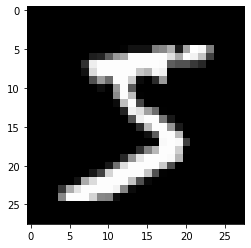

In [5]:
# Reshape the first image x_train_0 (28 x 28)  
plt.imshow(x_train_mnist[0].reshape((28, 28)), cmap = "gray")
plt.show()

### 2.3.3 Reparameterization trick

Instead of sampling from q(z|x), sample epsilon = N(0,I)

z = m_x + s_x * epsilon


In [6]:
def sampling(args):
    """Reparameterization trick by sampling from an isotropic unit Gaussian.
    # Arguments
        args (tensor): mean and log of variance of q(z|x)
    # Returns
        z (tensor): sampled latent vector
    """
    m_x, log_s_x = args
    batch_size = K.shape(m_x)[0]
    latent_dimension = K.int_shape(m_x)[1]
    eps = K.random_normal(shape=(batch_size, latent_dimension))
    return m_x + K.exp(0.5 * log_s_x) * eps

### 2.3.4 Model Architecture

#### 2.3.4.1 Encoder

In [7]:
D = 784 # The original dimension of both mnist and blobs dataset is 784

# network parameters
input_shape = (D, )
intermediate_dim = 512 # the dimension of the hidden layer is 512
M = 512 # the batch size  
d = 2 # The latent dimension is 2
epochs = 50 

# VAE model = encoder + decoder
# build encoder model
inputs_mnist = Input(shape=input_shape, name='encoder_input_mnist')
x = Dense(intermediate_dim, activation='relu')(inputs_mnist)
m_x = Dense(d, name='m_x')(x)
log_s_x = Dense(d, name='log_s_x')(x)

# use reparameterization trick to push the sampling out as input
z = Lambda(sampling, output_shape=(d,), name='z')([m_x, log_s_x])

# instantiate encoder model
encoder_mnist = Model(inputs_mnist, [m_x, log_s_x, z], name='encoder_mnist')
encoder_mnist.summary()

Model: "encoder_mnist"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input_mnist (InputLayer [(None, 784)]        0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 512)          401920      encoder_input_mnist[0][0]        
__________________________________________________________________________________________________
m_x (Dense)                     (None, 2)            1026        dense[0][0]                      
__________________________________________________________________________________________________
log_s_x (Dense)                 (None, 2)            1026        dense[0][0]                      
______________________________________________________________________________________

#### 2.3.4.2 Decoder

In [8]:
# build decoder model
latent_inputs_mnist = Input(shape=(d,), name='z_sampling')
x = Dense(intermediate_dim, activation='relu')(latent_inputs_mnist)
outputs_mnist = Dense(D, activation='sigmoid')(x) # as data is in range [0, 1]

# instantiate decoder model
decoder_mnist = Model(latent_inputs_mnist, outputs_mnist, name='decoder_mnist')
decoder_mnist.summary()


Model: "decoder_mnist"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
z_sampling (InputLayer)      [(None, 2)]               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1536      
_________________________________________________________________
dense_2 (Dense)              (None, 784)               402192    
Total params: 403,728
Trainable params: 403,728
Non-trainable params: 0
_________________________________________________________________


#### 2.3.4.3 The whole model

In [9]:
# instantiate VAE model
outputs_mnist = decoder_mnist(encoder_mnist(inputs_mnist)[2]) # the decoder (as a layer) is applied to the third output of the encoder (the sampled z)
vae_mnist = Model(inputs_mnist, outputs_mnist, name='vae_mnist')
vae_mnist.summary()

Model: "vae_mnist"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input_mnist (InputLa [(None, 784)]             0         
_________________________________________________________________
encoder_mnist (Model)        [(None, 2), (None, 2), (N 403972    
_________________________________________________________________
decoder_mnist (Model)        (None, 784)               403728    
Total params: 807,700
Trainable params: 807,700
Non-trainable params: 0
_________________________________________________________________


### 2.3.5 The loss Function: binary cross entropy + KL

In [10]:
reconstruction_loss = binary_crossentropy(inputs_mnist,outputs_mnist)
reconstruction_loss *= D
kl_loss = K.exp(log_s_x) + K.square(m_x) -1 - log_s_x 
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= 0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae_mnist.add_loss(vae_loss)
vae_mnist.compile(optimizer='adam')

### 2.3.6 Training the VAE

In [11]:
history = vae_mnist.fit(x_train_mnist,
        epochs=epochs,
        batch_size=M,
        validation_data=(x_test_mnist, None))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 12s 193us/sample - loss: 243.6500 - val_loss: 193.1189
Epoch 2/50
60000/60000 [==============================] - 9s 151us/sample - loss: 187.3877 - val_loss: 182.3209
Epoch 3/50
60000/60000 [==============================] - 11s 179us/sample - loss: 179.0136 - val_loss: 174.5129
Epoch 4/50
60000/60000 [==============================] - 13s 211us/sample - loss: 172.1345 - val_loss: 169.6345
Epoch 5/50
60000/60000 [==============================] - 10s 167us/sample - loss: 168.3884 - val_loss: 167.2703
Epoch 6/50
60000/60000 [==============================] - 9s 151us/sample - loss: 166.4210 - val_loss: 165.8066
Epoch 7/50
60000/60000 [==============================] - 11s 183us/sample - loss: 165.0093 - val_loss: 164.5581
Epoch 8/50
60000/60000 [==============================] - 11s 179us/sample - loss: 163.8190 - val_loss: 163.5277
Epoch 9/50
60000/60000 [========================

### 2.3.7 Plot the loss function for both training data and validation data

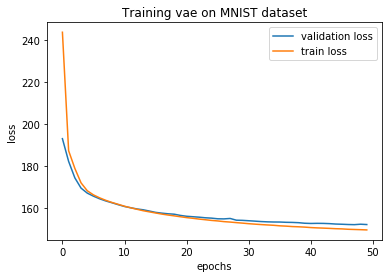

In [12]:
val_loss = history.history["val_loss"]
loss = history.history["loss"]
plt.plot(val_loss, label = "validation loss")
plt.plot(loss, label = "train loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Training vae on MNIST dataset")
plt.legend()
plt.show()

### 2.3.8 Visualization of reconstuction train and test dataset

In the picture below, the objective is to show the reconstruction ability of the network on training and validation data. In each of the two images, the left column is MNIST images and the right column is the corresponding image after passing through the variational autoencoder.

Getting the best possible reconstruction is not the point of VAE, the KL term of the objective specifically hurts the reconstruction performance. But the reconstruction should be anyway reasonable.

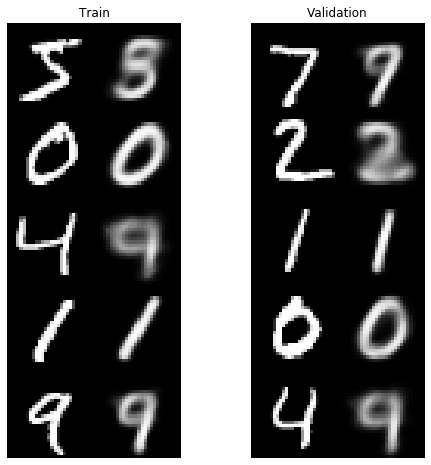

In [13]:
fig = plt.figure(figsize=(8, 8))
for fid_idx, (data, title) in enumerate(
            zip([x_train_mnist[:5], x_test_mnist[:5]], ['Train', 'Validation'])):
    n = 5 
    digit_size = 28
    figure = np.zeros((digit_size * n, digit_size * 2))
    decoded = vae_mnist.predict(data)
    for i in range(n):
        figure[i * digit_size: (i + 1) * digit_size,
               :digit_size] = data[i, :].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               digit_size:] = decoded[i, :].reshape(digit_size, digit_size)
    ax = fig.add_subplot(1, 2, fid_idx + 1)
    ax.imshow(figure, cmap='Greys_r')
    ax.set_title(title)
    ax.axis('off')
plt.show()

### 2.3.9 Data Generation

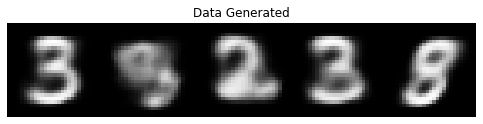

In [17]:
fig = plt.figure(figsize=(10, 10))
n = 5 
digit_size = 28
figure = np.zeros((digit_size, digit_size*5))
# Generate randomly 5 hidden z from N(0, I)
epsilon = K.random_normal(shape=(5, 2))
# Use the decoder to generate data 
data_gen = decoder_mnist.predict(epsilon)
for i in range(n):
    figure[:,i * digit_size: (i + 1) * digit_size] = data_gen[i, :].reshape(digit_size, digit_size)
ax = fig.add_subplot(5, 1, i + 1)
ax.imshow(figure, cmap='Greys_r')
ax.set_title("Data Generated")
ax.axis('off')
plt.show()

### 2.3.10 Dimensionality Reduction

In [18]:
m_x_test, _, _ = encoder_mnist.predict(x_test_mnist)
m_x_train, _, _ = encoder_mnist.predict(x_train_mnist)

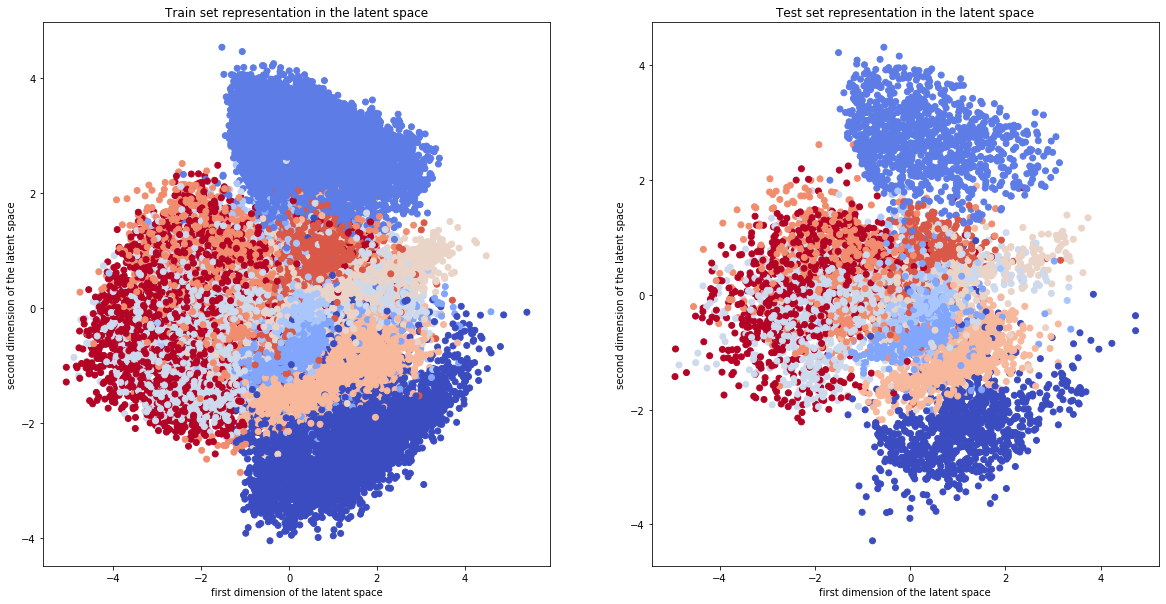

In [19]:
from matplotlib.cm import coolwarm

fig = plt.figure(figsize=(20, 10))
for fid_idx, (m_x, y, title) in enumerate(
            zip([m_x_train, m_x_test], [y_train_mnist, y_test_mnist], ['Train', 'Test'])):
    ax = fig.add_subplot(1, 2, fid_idx + 1)
    ax.scatter(m_x[:, 0], m_x[:, 1], c = y, cmap=coolwarm)
    ax.set_xlabel("first dimension of the latent space")
    ax.set_ylabel("second dimension of the latent space")
    ax.set_title("{} set representation in the latent space".format(title))
plt.show()

## 2.4 VAE for blobs dataset

### 2.4.1 Gaussian Blobs dataset

In [20]:
# Data
X, y = make_blobs(n_samples=100000, centers=10, n_features=784, random_state=0)
x_train_blobs = X.astype('float32')[:int(.8*len(X))]
y_train_blobs = y[:int(.8*len(X))]
x_test_blobs = X.astype('float32')[int(.8*len(X)):]
y_test_blobs = y[int(.8*len(X)):]
#min_max_scaler = preprocessing.MinMaxScaler()
#x_train_blobs = min_max_scaler.fit_transform(x_train_blobs)
#x_tests_blobs = min_max_scaler.transform(x_test_blobs)

### 2.4.2 Example of a scatter plot with the first and the last dimension 

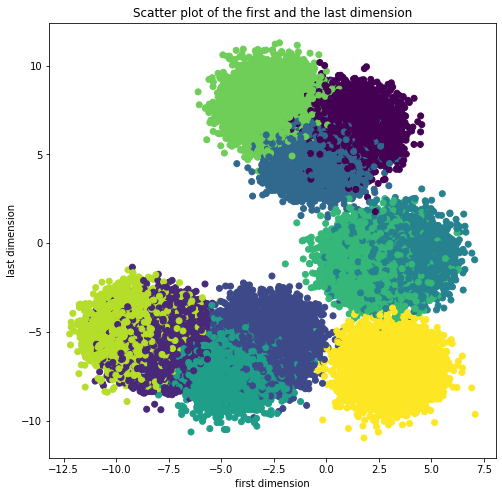

In [21]:
fig = plt.figure(figsize = (8, 8))
plt.scatter(x_train_blobs[:, 0], x_train_blobs[:, -1], c = y_train_blobs)
plt.xlabel('first dimension')
plt.ylabel("last dimension")
plt.title("Scatter plot of the first and the last dimension")
plt.show()

### 2.4.3 Reparameterization trick

Instead of sampling from q(z|x), sample epsilon = N(0,I)

z = m_x + s_x * epsilon

In [22]:
def sampling(args):
    """Reparameterization trick by sampling from an isotropic unit Gaussian.
    # Arguments
        args (tensor): mean and log of variance of q(z|x)
    # Returns
        z (tensor): sampled latent vector
    """
    m_x, log_s_x = args
    batch_size = K.shape(m_x)[0]
    latent_dimension = K.int_shape(m_x)[1]
    eps = K.random_normal(shape=(batch_size, latent_dimension))
    return m_x + K.exp(0.5 * log_s_x) * eps

### 2.4.4 Model Architecture

#### 2.4.4.1 Encoder

In [23]:
D = 784 # The original dimension of both mnist and blobs dataset is 784

# network parameters
input_shape = (D, )
intermediate_dim = 512 # the dimension of the hidden layer is 512
M = 512 # the batch size  
d = 2 # The latent dimension is 2
epochs = 50 

# VAE model = encoder + decoder
# build encoder model
inputs_blobs = Input(shape=input_shape, name='encoder_input_blobs')
x = Dense(intermediate_dim, activation='relu')(inputs_blobs)
m_x = Dense(d, name='m_x')(x)
log_s_x = Dense(d, name='log_s_x')(x)

# use reparameterization trick to push the sampling out as input
z = Lambda(sampling, output_shape=(d,), name='z')([m_x, log_s_x])

# instantiate encoder model
encoder_blobs = Model(inputs_blobs, [m_x, log_s_x, z], name='encoder_blobs')
encoder_blobs.summary()

Model: "encoder_blobs"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input_blobs (InputLayer [(None, 784)]        0                                            
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 512)          401920      encoder_input_blobs[0][0]        
__________________________________________________________________________________________________
m_x (Dense)                     (None, 2)            1026        dense_3[0][0]                    
__________________________________________________________________________________________________
log_s_x (Dense)                 (None, 2)            1026        dense_3[0][0]                    
______________________________________________________________________________________

#### 2.4.4.2 Decoder

In [24]:
# build decoder model
latent_inputs_blobs = Input(shape=(d,), name='z_sampling')
x = Dense(intermediate_dim, activation='relu')(latent_inputs_blobs)
outputs_blobs = Dense(D, activation='linear')(x) # as data is not bounded

# instantiate decoder model
decoder_blobs = Model(latent_inputs_blobs, outputs_blobs, name='decoder')
decoder_blobs.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
z_sampling (InputLayer)      [(None, 2)]               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               1536      
_________________________________________________________________
dense_5 (Dense)              (None, 784)               402192    
Total params: 403,728
Trainable params: 403,728
Non-trainable params: 0
_________________________________________________________________


#### 2.4.4.3 The whole model 

In [25]:
# instantiate VAE model
outputs_blobs = decoder_blobs(encoder_blobs(inputs_blobs)[2]) # the decoder (as a layer) is applied to the third output of the encoder (the sampled z)
vae_blobs = Model(inputs_blobs, outputs_blobs, name='vae_blobs')
vae_blobs.summary()

Model: "vae_blobs"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input_blobs (InputLa [(None, 784)]             0         
_________________________________________________________________
encoder_blobs (Model)        [(None, 2), (None, 2), (N 403972    
_________________________________________________________________
decoder (Model)              (None, 784)               403728    
Total params: 807,700
Trainable params: 807,700
Non-trainable params: 0
_________________________________________________________________


### 2.4.5 The loss Function: mse + KL

In [26]:
reconstruction_loss = mse(inputs_blobs,outputs_blobs) #  K.mean(K.abs(inputs_blobs - outputs_blobs), axis=-1) 
reconstruction_loss *= 1/2
kl_loss = K.exp(log_s_x) + K.square(m_x) -1 - log_s_x 
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= 0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae_blobs.add_loss(vae_loss)
vae_blobs.compile(optimizer='adam')

### 2.4.6 Training the VAE

In [27]:
history = vae_blobs.fit(x_train_blobs,
        epochs=epochs,
        batch_size=M,
        validation_data=(x_test_blobs, None))

Train on 80000 samples, validate on 20000 samples
Epoch 1/50
80000/80000 [==============================] - 12s 154us/sample - loss: 25.1748 - val_loss: 16.7212
Epoch 2/50
80000/80000 [==============================] - 10s 129us/sample - loss: 15.9626 - val_loss: 15.3281
Epoch 3/50
80000/80000 [==============================] - 9s 116us/sample - loss: 14.9298 - val_loss: 14.2630
Epoch 4/50
80000/80000 [==============================] - 11s 141us/sample - loss: 13.3614 - val_loss: 13.3388
Epoch 5/50
80000/80000 [==============================] - 12s 156us/sample - loss: 12.3048 - val_loss: 11.9309
Epoch 6/50
80000/80000 [==============================] - 12s 147us/sample - loss: 11.6194 - val_loss: 11.7241
Epoch 7/50
80000/80000 [==============================] - 10s 128us/sample - loss: 11.2837 - val_loss: 11.2830
Epoch 8/50
80000/80000 [==============================] - 9s 114us/sample - loss: 10.6179 - val_loss: 10.6801
Epoch 9/50
80000/80000 [==============================] - 9s 107

### 2.4.7 Plot the loss function for both training data and validation data

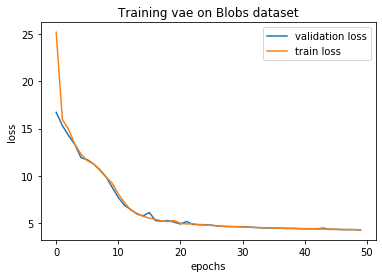

In [28]:
val_loss = history.history["val_loss"]
loss = history.history["loss"]
plt.plot(val_loss, label = "validation loss")
plt.plot(loss, label = "train loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Training vae on Blobs dataset")
plt.legend()
plt.show()

### 2.4.8 Dimensionality Reduction

In [29]:
m_x_test, _, _ = encoder_blobs.predict(x_test_blobs)
m_x_train, _, _ = encoder_blobs.predict(x_train_blobs)

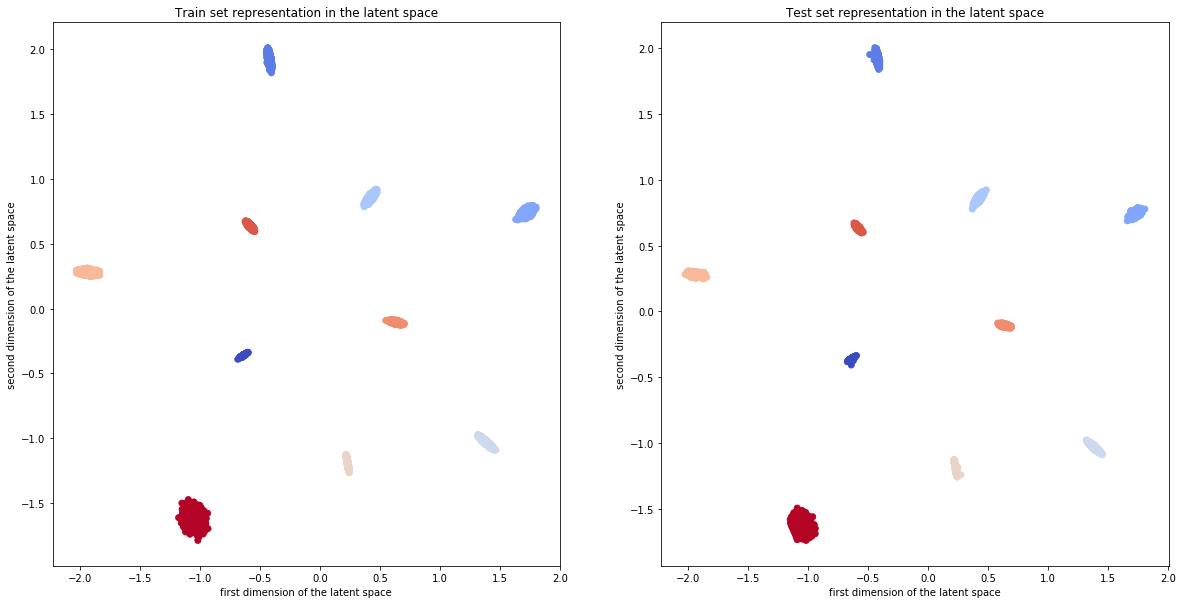

In [30]:
from matplotlib.cm import coolwarm

fig = plt.figure(figsize=(20, 10))
for fid_idx, (m_x, y, title) in enumerate(
            zip([m_x_train, m_x_test], [y_train_blobs, y_test_blobs], ['Train', 'Test'])):
    ax = fig.add_subplot(1, 2, fid_idx + 1)
    ax.scatter(m_x[:, 0], m_x[:, 1], c = y, cmap=coolwarm)
    ax.set_xlabel("first dimension of the latent space")
    ax.set_ylabel("second dimension of the latent space")
    ax.set_title("{} set representation in the latent space".format(title))
plt.show()